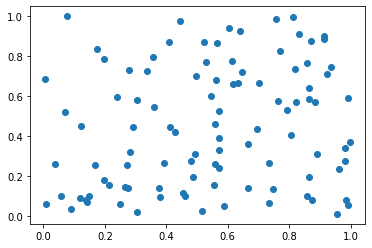

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

N = 100
pts = np.random.random((N,2))

plt.scatter(pts[:,0], pts[:,1])

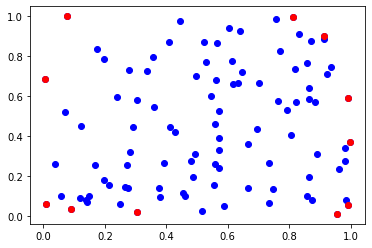

In [13]:
def scatt(pts, c='blue'):
    pts = np.array(pts)
    if len(pts) > 0:
        plt.scatter(pts[:,0], pts[:,1], c=c)

def dist(p, A, B):
    return norm(np.cross(B-A, A-p))/norm(B-A)

def side(pt, A, B):
    return ((pt[0]-A[0])*(B[1]-A[1])-(pt[1]-A[1])*(B[0]-A[0])) < 0

def same(p1, p2):
    return p1[0] == p2[0] and p1[1] == p2[1]

def partition_set(pts, A, B):
    set_A = []
    set_B = []
    for pt in pts:
        if not same(pt, A) and not same(pt, B):
            if side(pt, A, B):
                set_A.append(pt)
            else:
                set_B.append(pt)
    return np.array(set_A), np.array(set_B)

def findhull(pts, P, Q):
    if len(pts) == 0:
        return []
    d_p = lambda pt : dist(pt, P, Q)
    m = np.argmax(list(map(d_p, pts)))
    c = pts[m]
    hull = [c]
    np.delete(pts, m)
    S1, S0 = partition_set(pts, P, c)
    S2, S0 = partition_set(S0 , c, Q)
    
    hull += findhull(S1, P, c)
    hull += findhull(S2, c, Q)

    return hull

def quickhull(pts):
    hull = []
    l = min(pts, key=lambda p : p[0])
    r = max(pts, key=lambda p : p[0])
    hull += [l, r]
    
    ls, rs = partition_set(pts, l, r)
    hull += findhull(ls, l, r)
    hull += findhull(rs, r, l)
    
    return hull

hull = quickhull(pts)
scatt(pts)
scatt(hull, c='red')

12
2.1213203435596424


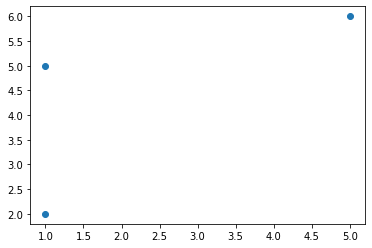

In [15]:
pts = np.array([[1, 5], [1,2],[5,6]])

A = (1, 5)
B = (1, 2)
C = (5, 6)

def dist(A,B,C):
    tp = np.abs((C[0] - B[0]) * (B[1] - A[1]) - (B[0] - A[0]) * (C[1] - B[1]))
    print(tp)
    bt = np.sqrt((C[0] - B[0]) ** 2 + (C[1] - B[1]) ** 2)
    return tp/bt
    
print(dist(A,B,C))
plt.scatter(pts[:,0],pts[:,1])